In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV

In [2]:
# First, let’s examine the data itself and see what we can learn from it before starting training our model.

In [3]:
df = pd.read_csv('csvs/hearing_test.csv')
df_copy = df.copy()
df_copy.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


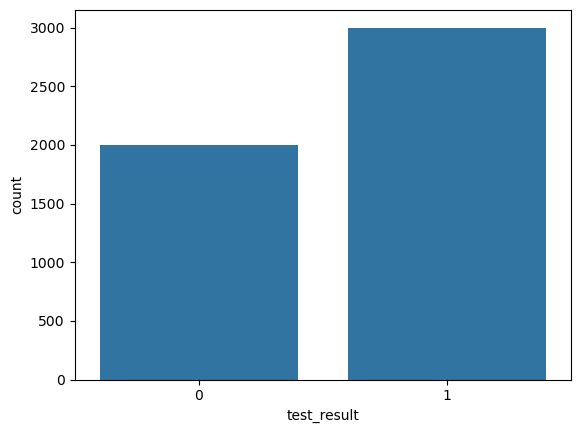

In [4]:
sns.countplot(data=df_copy, x=df['test_result'])
plt.show()

In [5]:
# Let’s explore the correlation between the features and the test result:

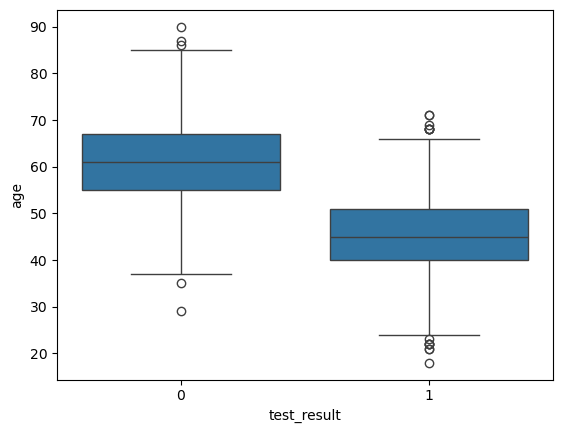

In [6]:
sns.boxplot(data=df_copy, x=df['test_result'], y='age')
plt.show()

In [7]:
# We can see that younger aged people
# are more likely to successfully pass the
# test then older age people

<Axes: xlabel='age', ylabel='physical_score'>

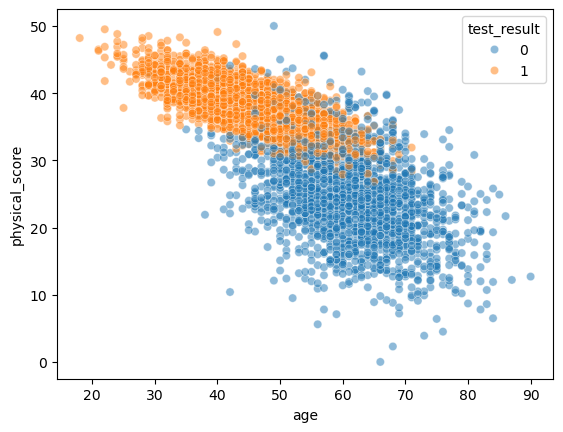

In [8]:
sns.scatterplot(data=df_copy, x='age', y='physical_score', hue='test_result', alpha=0.5)

In [9]:
# We can see that younger people tend to get
# higher physical score and people with high
# physical score are more likely to successfully
# pass the test.

In [10]:
# The class is now finished for today, 12/02.